# 주제 : 데이터 분석으로 심부전증 예측
----------

## 데이터 소개
 
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
   
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기


In [5]:
# 걍 이번에는 csv로 가져오자

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv("/Users/myeongjinlee/Desktop/UPSTAGE AI/ml/ML/mini project/heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [7]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 문제 5. 수치형 데이터의 히스토그램 그리기


<AxesSubplot:xlabel='age', ylabel='Count'>

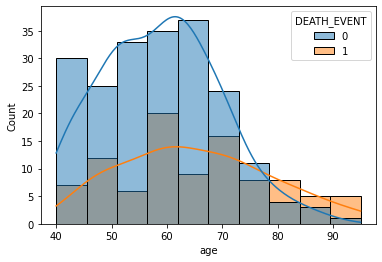

In [10]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

#sns.histplot(data=df,x='age')
sns.histplot(data=df,x='age',hue='DEATH_EVENT',kde=True)


In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

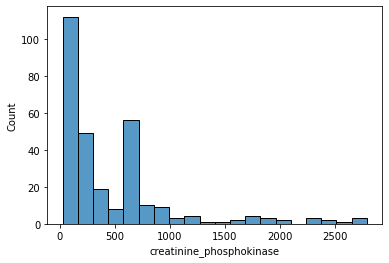

In [12]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase']<3000,'creatinine_phosphokinase'])

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

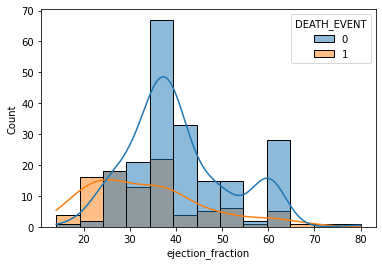

In [13]:
sns.histplot(data=df, x='ejection_fraction',bins=13,hue='DEATH_EVENT',kde=True)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

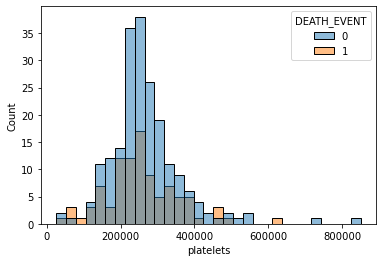

In [14]:
#혈소판 수치
sns.histplot(data=df,x='platelets',hue='DEATH_EVENT')

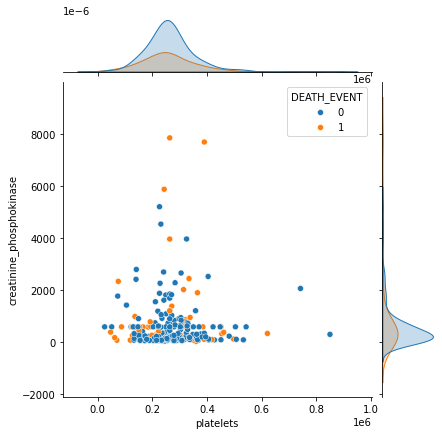

In [15]:
sns.jointplot(data=df,x='platelets',y='creatinine_phosphokinase',hue='DEATH_EVENT')

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

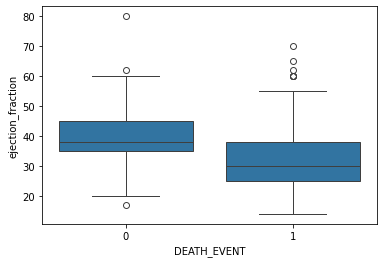

In [16]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능
# 회사 높으신분들 앞에서 pt할 때 박스플롯이 유용

sns.boxplot(data=df,x='DEATH_EVENT',y='ejection_fraction')

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

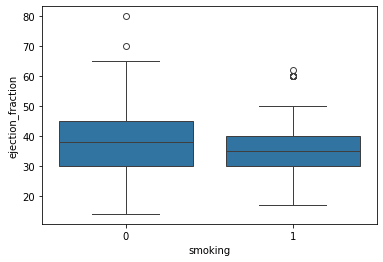

In [17]:
sns.boxplot(data=df,x='smoking',y='ejection_fraction')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

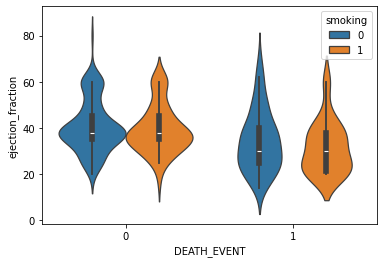

In [18]:
sns.violinplot(data=df,x='DEATH_EVENT',y='ejection_fraction',hue='smoking')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


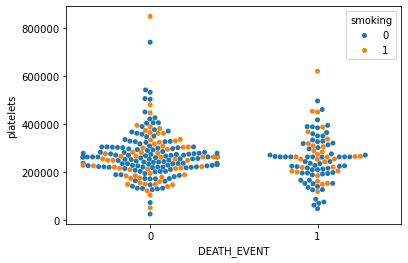

In [19]:
sns.swarmplot(data =df, x='DEATH_EVENT',y='platelets',hue='smoking')

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [20]:
from sklearn.preprocessing import StandardScaler # 수치형 데이터만 mean =0, standard deviation(데이터 집합의 표준편차) =1
                                                 #로 바꿔주는 작업 

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [22]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [23]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']]
X_cat = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
y = df['DEATH_EVENT']

In [24]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data =X_scaled , index =X_num.index , columns =X_num.columns)
X = pd.concat([X_scaled,X_cat],axis=1)

In [25]:
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1) #shuffle=True

In [28]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
14,-0.996547,-0.518074,-0.684180,1.675963,-0.381379,0.312044,1,0,1,0,0
210,0.771889,-0.381804,-1.784473,1.286781,-0.381379,-0.141976,0,1,1,1,1
236,1.192945,-0.477812,1.008578,-0.157292,-0.284552,2.582144,0,0,1,1,0
44,-0.070223,0.006360,1.854958,-0.710340,-0.284552,1.220084,1,1,0,0,0
163,-0.912335,1.808842,-0.260991,-1.929096,-0.478205,1.220084,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
203,-0.070223,-0.539753,-1.107370,-0.525991,2.039276,-0.141976,0,0,1,1,1
255,-0.743913,-0.403483,-0.684180,0.723490,-0.381379,1.220084,1,1,1,1,1
72,2.035057,5.471619,-0.260991,-0.208500,-0.381379,-1.050016,0,0,0,1,1
235,1.361368,-0.488136,1.008578,1.460889,-0.284552,0.085034,1,0,1,1,0


In [29]:
X_test

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
173,-0.912335,-0.481942,-1.530560,-0.761549,-0.575031,0.539054,1,0,0,1,0
287,-1.333392,0.000166,1.431768,2.863994,-0.381379,-1.050016,0,1,0,0,0
51,-0.659702,-0.506718,-1.530560,1.583788,0.005926,0.539054,1,0,1,0,0
146,-0.743913,-0.464392,-0.684180,-0.464541,-0.671857,-0.141976,0,0,0,1,1
214,0.350833,-0.461295,-0.260991,0.272858,-0.575031,-0.595996,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
122,-0.070223,-0.501556,-0.007077,-0.362124,-0.623444,0.766064,0,1,0,0,0
246,-0.491279,1.481588,-1.107370,0.518657,-0.284552,0.312044,0,0,0,1,0
278,-0.912335,0.484338,-0.684180,-0.321158,-0.671857,-0.141976,1,1,0,0,0
251,-0.491279,-0.010158,-0.260991,-0.331400,-0.575031,1.447094,0,1,0,0,0


In [30]:
y_train

14     0
210    0
236    0
44     1
163    1
      ..
203    0
255    0
72     1
235    0
37     1
Name: DEATH_EVENT, Length: 209, dtype: int64

In [31]:
y_test

173    0
287    0
51     1
146    0
214    0
      ..
122    0
246    1
278    0
251    0
19     1
Name: DEATH_EVENT, Length: 90, dtype: int64

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [32]:
from sklearn.linear_model import LogisticRegression #sigmoid

In [33]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train,y_train)




LogisticRegression(max_iter=1000)

### 문제 10. 모델 학습 결과 평가하기


In [34]:
from sklearn.metrics import classification_report

In [35]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



### 문제 11. XGBoost 모델 생성/학습하기


In [36]:
from xgboost import XGBClassifier

In [37]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 문제 12. 모델 학습 결과 평가하기


In [38]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred)) #f1은 precision, recall의 조화평균 

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        64
           1       0.59      0.50      0.54        26

    accuracy                           0.76        90
   macro avg       0.70      0.68      0.69        90
weighted avg       0.75      0.76      0.75        90



Precision (정밀도): Precision은 모델이 긍정 클래스(1)로 예측한 것 중에서 실제로 긍정 클래스인 비율을 나타냅니다. 긍정 클래스로 예측한 결과 중 얼마나 많이 실제로 긍정 클래스인지를 나타내는 지표입니다. 여기서는 긍정 클래스 1에 대한 정밀도가 0.78로 나타납니다.

Recall (재현율): Recall은 실제 긍정 클래스(1) 중에서 모델이 긍정 클래스로 정확하게 예측한 비율을 나타냅니다. 모델이 실제 긍정 클래스를 얼마나 잘 재현하는지를 나타내는 지표입니다. 여기서는 긍정 클래스 1의 재현율이 0.81로 나타납니다.

F1-score (F1-점수): F1-점수는 정밀도와 재현율의 조화 평균입니다. 이는 정밀도와 재현율을 모두 고려하여 모델의 성능을 하나의 숫자로 요약합니다. F1-점수는 모델의 정확도와 균형을 평가하는 데 유용한 지표입니다. 여기서는 F1-점수가 0.79로 나타납니다.

Accuracy (정확도): Accuracy는 모델이 전체 샘플 중에서 올바르게 분류한 비율을 나타냅니다. 모델의 전체적인 성능을 측정하는 지표입니다. 여기서는 정확도가 0.88로 나타납니다.

Support: Support는 각 클래스(0 또는 1)에 대한 샘플 수를 나타냅니다. 여기서는 클래스 0에 64개의 샘플이 있고, 클래스 1에 26개의 샘플이 있음을 나타냅니다.

Macro avg (매크로 평균): 매크로 평균은 클래스마다 평가 지표 (정밀도, 재현율, F1-점수)의 평균을 나타냅니다. 이것은 각 클래스에 대한 평가를 동등하게 다루는 지표입니다.

Weighted avg (가중 평균): 가중 평균은 클래스마다 평가 지표의 평균을 계산할 때 각 클래스의 지원(샘플 수)을 가중치로 고려합니다. 이것은 클래스 간의 불균형이 있는 경우에 유용한 평가 지표입니다.



### 문제 13. 특징의 중요도 확인하기


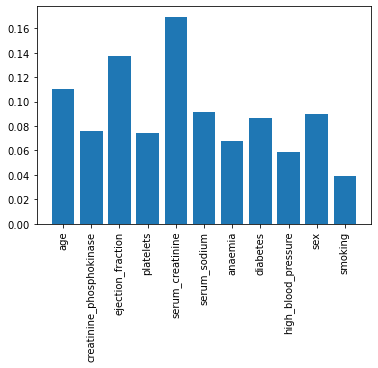

In [39]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot

plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()
#관찰 초기에 사망을 해서 타임이 낮게 나올 수 밖에 없었던 경우들이 많음. 

<AxesSubplot:xlabel='time', ylabel='Count'>

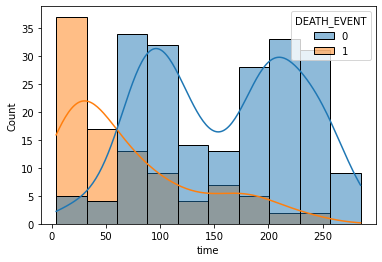

In [40]:
sns.histplot(data= df, x='time', hue='DEATH_EVENT',kde = True)#관찰 초기에 사망을 해서 타임이 낮게 나올 수 밖에 없었던 경우들이 많음. 
# 사망 결과를 보았기 때문에 타임이 이미 결정이 됐다. -> 이런 경우를 data requeeze  # time data에는 이미 death_event의 결과가 이미포함
# 때문에 time이 결정되려면 death_event 발생 이후가 될 수 도 있음. 그러기 때문에 다시 수치형 데이터에서 타임 제거 하자!!(위 올라가서 제거)

time 줄이니깐 확실히 성능 낮아짐 확인 가능

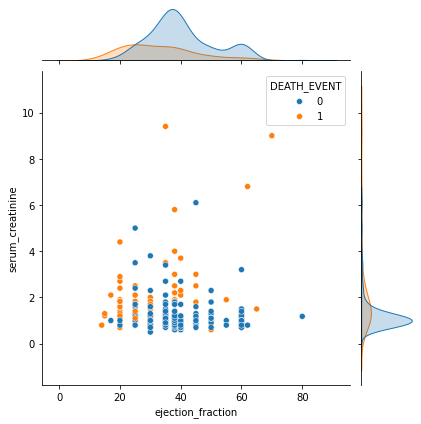

In [41]:
sns.jointplot(x = 'ejection_fraction' , y='serum_creatinine', data=df,hue='DEATH_EVENT')

## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [42]:
#from sklearn.metrics import plot_precision_recall_curve #prescion과 recall의 관계 파악 
from sklearn.metrics import PrecisionRecallDisplay # 위에거는 과거 이거 쓰자 

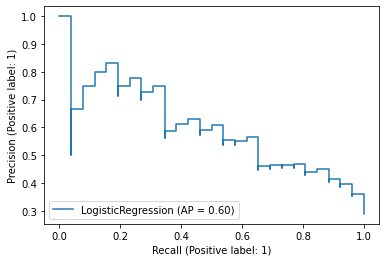

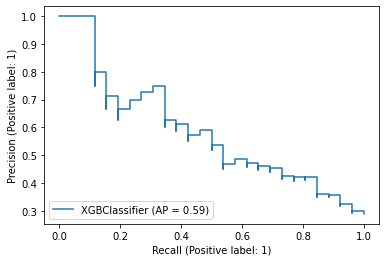

In [43]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

precision_recall_display = PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test)
precision_recall_display = PrecisionRecallDisplay.from_estimator(model_xgb, X_test, y_test)





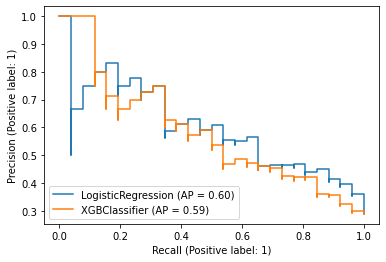

In [44]:
fig = plt.figure()
ax = fig.gca()

precision_recall_display = PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test,ax=ax)
precision_recall_display = PrecisionRecallDisplay.from_estimator(model_xgb, X_test, y_test,ax=ax)


### 문제 15. ROC 커브 확인하기

In [46]:
#from sklearn.metrics import plot_roc_curve
# DEPRECATED: Function plot_roc_curve is deprecated in 1.0 and will be removed in 1.2. 
#Use one of the class methods: sklearn.metric.RocCurveDisplay.from_predictions or sklearn.metric.RocCurveDisplay.from_estimator.

from sklearn.metrics import RocCurveDisplay




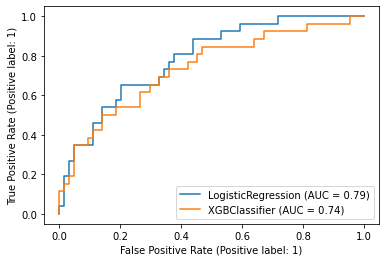

In [48]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax = fig.gca()
roc_curve_display = RocCurveDisplay.from_estimator(model_lr , X_test,y_test,ax=ax)
roc_curve_display = RocCurveDisplay.from_estimator(model_xgb , X_test,y_test,ax=ax)



# False positve Rate vs True positve Rate.  두 가지 비교 그래프 